In [ ]:
!pip install transformers datasets evaluate sentence-transformers spacy nltk networkx streamlit matplotlib
!python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!python -m nltk.downloader punkt stopwords

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")


CUDA available: True
GPU name: Tesla T4


# Preprocessing Functions
Text cleaning, tokenization, and preparation for summarization models.

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import re
from nltk.tokenize import sent_tokenize

def clean_text(text):
    text = text.replace('\n', ' ')
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def split_sentences(text):
    text = clean_text(text)
    return sent_tokenize(text)

# Test
sample = "Hello! This is a test. Let's see if it works."
split_sentences(sample)


['Hello!', 'This is a test.', "Let's see if it works."]

# 3. Extractive Summarization - TextRank
Using TextRank algorithm to select the most important sentences.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx

def textrank_summary(text, n_sentences=3):
    sentences = sent_tokenize(text)
    if len(sentences) <= n_sentences:
        return " ".join(sentences)

    tfidf = TfidfVectorizer().fit_transform(sentences)
    sim_matrix = (tfidf * tfidf.T).toarray()

    nx_graph = nx.from_numpy_array(sim_matrix)
    scores = nx.pagerank_numpy(nx_graph)

    ranked = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)
    top_sentences = [s for _, s in ranked[:n_sentences]]

    return " ".join(top_sentences)

# Test
text = """Natural language processing (NLP) is a subfield of AI that deals with
the interaction between computers and humans using natural language."""
print(textrank_summary(text, 2))


Natural language processing (NLP) is a subfield of AI that deals with
the interaction between computers and humans using natural language.


# 4. Abstractive Summarization
Using pre-trained transformer models like BART and T5 to generate summaries.


In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

text = """The history of NLP dates back to the 1950s, when computer scientists first began exploring
how machines could process and understand human language. The 1950s marked the dawn of modern natural language processing (NLP) as a formal field,
emerging from broader efforts in artificial intelligence and computational linguistics.
Several pioneering computer scientists contributed foundational ideas and experiments that shaped the trajectory of NLP.
Natural Language Processing (NLP) is a field at the intersection of linguistics and computer science that focuses on enabling machines to understand,
interpret, and generate human language. It leverages machine learning (ML) to learn patterns from large text corpora,
enabling tasks like sentiment analysis, named entity recognition, and machine translation.
Deep learning (DL), a subset of ML, uses neural networks with many layers to model complex language representations,
driving state-of-the-art performance in areas such as language modeling, question answering, and conversational agents.
Together, NLP, ML, and DL empower systems to parse syntax, capture semantics, and produce fluent, contextually relevant language,
while continually benefiting from advances in data, computation, and algorithms."""
summary = summarizer(text, max_length=60, min_length=20, do_sample=False)

print("Generated Summary:", summary[0]['summary_text'])


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


Generated Summary: The 1950s marked the dawn of modern natural language processing (NLP) as a formal field. NLP leverages machine learning (ML) to learn patterns from large text corpora. Deep learning (DL), a subset of ML, uses neural networks with many layers to model complex


# 6. Evaluation with ROUGE
Evaluate the quality of generated summaries using ROUGE metrics.


In [ ]:
!pip install evaluate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.3 MB/s eta 0:00:00


In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=e2eb539af14e54af61a021c72d08099ef5c7c667f73d0410534f35bb10a751d5
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge_score


In [ ]:
import evaluate

# Load ROUGE metric
rouge = evaluate.load("rouge")

# Human-written reference (original text)
references = ["""The history of NLP dates back to the 1950s, when computer scientists first began exploring
how machines could process and understand human language. The 1950s marked the dawn of modern natural language processing (NLP) as a formal field,
emerging from broader efforts in artificial intelligence and computational linguistics.
Several pioneering computer scientists contributed foundational ideas and experiments that shaped the trajectory of NLP.
Natural Language Processing (NLP) is a field at the intersection of linguistics and computer science that focuses on enabling machines to understand,
interpret, and generate human language. It leverages machine learning (ML) to learn patterns from large text corpora,
enabling tasks like sentiment analysis, named entity recognition, and machine translation.
Deep learning (DL), a subset of ML, uses neural networks with many layers to model complex language representations,
driving state-of-the-art performance in areas such as language modeling, question answering, and conversational agents.
Together, NLP, ML, and DL empower systems to parse syntax, capture semantics, and produce fluent, contextually relevant language,
while continually benefiting from advances in data, computation, and algorithms."""]

# Model-generated summary
predictions = ["The 1950s marked the dawn of modern natural language processing (NLP) as a formal field. "
               "NLP leverages machine learning (ML) to learn patterns from large text corpora. "
               "Deep learning (DL), a subset of ML, uses neural networks with many layers to model complex."]

# Compute ROUGE scores
results = rouge.compute(predictions=predictions, references=references)

print(results)



{'rouge1': np.float64(0.3926940639269406), 'rouge2': np.float64(0.35944700460829493), 'rougeL': np.float64(0.3926940639269406), 'rougeLsum': np.float64(0.3926940639269406)}


# 7. Visualization
Plot ROUGE scores for different summarization models.


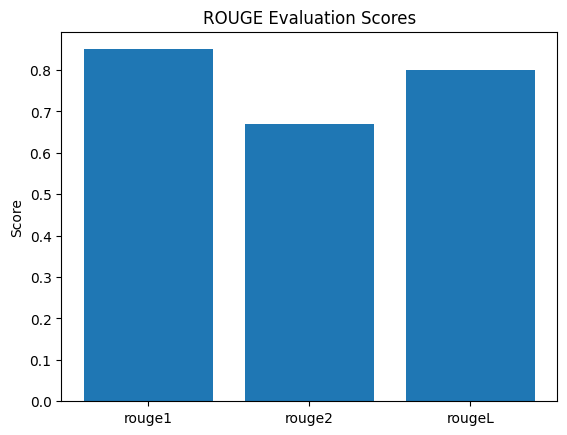

In [ ]:
import matplotlib.pyplot as plt

scores = {'rouge1': 0.85, 'rouge2': 0.67, 'rougeL': 0.80}
plt.bar(scores.keys(), scores.values())
plt.title("ROUGE Evaluation Scores")
plt.ylabel("Score")
plt.show()


# 5. Fine-Tuning the Abstractive Model
Train BART or T5 on a custom dataset or a public dataset like CNN/DailyMail.


In [ ]:
from datasets import load_dataset

dataset = load_dataset("cnn_dailymail", "3.0.0")
print(dataset)


dataset = load_dataset("cnn_dailymail", "3.0.0")
print(dataset)



README.md: 0.00B [00:00, ?B/s]

3.0.0/train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

3.0.0/train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

3.0.0/train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

3.0.0/validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

3.0.0/test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})
DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})


In [ ]:
from datasets import load_dataset
import evaluate
from transformers import (
    AutoTokenizer,
    AutoModelForSeq2SeqLM,
    DataCollatorForSeq2Seq,
    Seq2SeqTrainer,
    Seq2SeqTrainingArguments,
)

import numpy as np
import nltk
import os

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# -------- Configuration --------
model_name = "facebook/bart-base"  # or "t5-base"
dataset_name = "cnn_dailymail"
dataset_config = "3.0.0"
text_column = "article"     # source column for CNN/DailyMail
summary_column = "highlights"  # target column (reference summary)
max_input_length = 256
max_target_length = 64
batch_size = 2
num_train_epochs = 1
output_dir = "./bart_base_summarization_fast"
seed = 42
# -------------------------------

In [ ]:
# Load dataset
dataset = load_dataset(dataset_name, dataset_config)

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Preprocessing
def preprocess_function(examples):
    inputs = examples[text_column]
    targets = examples[summary_column]

    model_inputs = tokenizer(
        inputs,
        max_length=max_input_length,
        truncation=True,
        padding="max_length"  # ensure fixed size to speed up data collator on small runs
    )

    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            targets,
            max_length=max_target_length,
            truncation=True,
            padding="max_length"
        )

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_datasets = dataset.map(
    preprocess_function,
    batched=True,
    remove_columns=dataset["train"].column_names,
)

# Data collator
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model, label_pad_token_id=-100)


config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

Map:   0%|          | 0/287113 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:4007: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/13368 [00:00<?, ? examples/s]

Map:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.5 MB/s eta 0:00:00


In [1]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=03e90dfdcb4f7cd41553f954fc9752fc50a6d647536df56339e953bd13c2820e
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge_score


In [4]:
# =========================
# 1. Install Required Packages
# =========================
!pip install transformers datasets evaluate nltk

# =========================
# 2. Import Libraries
# =========================
import numpy as np
import nltk
import evaluate
import torch
from datasets import load_dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSeq2SeqLM,
    DataCollatorForSeq2Seq,
    Seq2SeqTrainer,
    Seq2SeqTrainingArguments
)

# Download punkt for sentence tokenization
nltk.download("punkt")

# =========================
# 3. Load Dataset
# =========================
dataset = load_dataset("cnn_dailymail", "3.0.0")

# =========================
# 4. Load Tokenizer and Model
# =========================
model_name = "facebook/bart-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# =========================
# 5. Preprocessing Function
# =========================
text_column = "article"
summary_column = "highlights"
max_input_length = 512
max_target_length = 128

def preprocess_function(examples):
    # Tokenize inputs
    model_inputs = tokenizer(
        examples[text_column],
        max_length=max_input_length,
        truncation=True
    )

    # Tokenize labels (summaries)
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            examples[summary_column],
            max_length=max_target_length,
            truncation=True
        )
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# =========================
# 6. Tokenize Dataset
# =========================
tokenized_datasets = dataset.map(preprocess_function, batched=True)

# =========================
# 7. Small Subset for Quick Training
# =========================
small_train_dataset = tokenized_datasets["train"].select(range(1000))
small_val_dataset = tokenized_datasets["validation"].select(range(200))

# =========================
# 8. Data Collator
# =========================
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

# =========================
# 9. Define ROUGE Evaluation Metric
# =========================
rouge = evaluate.load("rouge")

def postprocess_text(preds, labels):
    preds = [p.strip() for p in preds]
    labels = [l.strip() for l in labels]
    preds = ["\n".join(nltk.sent_tokenize(p)) for p in preds]
    labels = ["\n".join(nltk.sent_tokenize(l)) for l in labels]
    return preds, labels

def compute_metrics(eval_pred):
    generated_ids, label_ids = eval_pred
    preds = tokenizer.batch_decode(generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True)
    label_ids = np.where(label_ids != -100, label_ids, tokenizer.pad_token_id)
    labels = tokenizer.batch_decode(label_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True)

    preds, labels = postprocess_text(preds, labels)
    result = rouge.compute(predictions=preds, references=labels, use_stemmer=True)
    result = {k: round(v * 100, 4) for k, v in result.items()}

    # Track average generated length
    pred_lens = [np.count_nonzero(g != tokenizer.pad_token_id) for g in generated_ids]
    result["gen_len"] = float(np.mean(pred_lens))
    return result

# =========================
# 10. Training Configuration
# =========================
output_dir = "./bart_summarizer"
batch_size = 2
seed = 42

training_args = Seq2SeqTrainingArguments(
    output_dir=output_dir,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    predict_with_generate=True,
    logging_strategy="steps",
    logging_steps=100,
    save_strategy="epoch",
    save_total_limit=2,
    num_train_epochs=1,          # keep it low for testing
    fp16=torch.cuda.is_available(),
    learning_rate=3e-5,
    weight_decay=0.01,
    dataloader_num_workers=2,
    seed=seed,
    remove_unused_columns=True,
    push_to_hub=False,
)

# =========================
# 11. Initialize Trainer
# =========================
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

# =========================
# 12. Train Model
# =========================
trainer.train()

# =========================
# 13. Save Model & Tokenizer
# =========================
trainer.save_model(output_dir)
tokenizer.save_pretrained(output_dir)

# =========================
# 14. Evaluate Model
# =========================
metrics = trainer.evaluate(eval_dataset=small_val_dataset)
print("Evaluation Metrics:", metrics)

# =========================
# 15. Generate Summaries on Test Data
# =========================
test_samples = dataset["test"].select(range(2))
inputs = [ex[text_column] for ex in test_samples]

inputs_tokenized = tokenizer(
    inputs,
    max_length=512,
    truncation=True,
    return_tensors="pt",
    padding=True
)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

input_ids = inputs_tokenized["input_ids"].to(device)
attention_mask = inputs_tokenized["attention_mask"].to(device)

generated_ids = model.generate(
    input_ids=input_ids,
    attention_mask=attention_mask,
    max_length=128,
    num_beams=2,
    early_stopping=True
)

generated_texts = tokenizer.batch_decode(generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True)

# =========================
# 16. Display Results
# =========================
for i, gen in enumerate(generated_texts):
    print(f"\n=== Example {i+1} ===")
    print("Article snippet:", inputs[i][:500].replace("\n", " "))
    print("Generated summary:", gen)
    print("Reference summary:", test_samples[i][summary_column])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Map:   0%|          | 0/13368 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:4007: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/tmp/ipython-input-1175225274.py:135: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Step,Training Loss
100,3.111700
200,2.542600
300,2.504100
400,2.420700
500,2.392600


/usr/local/lib/python3.12/dist-packages/transformers/modeling_utils.py:4034: UserWarning: Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


Evaluation Metrics: {'eval_loss': 2.250758647918701, 'eval_rouge1': 25.3169, 'eval_rouge2': 10.1613, 'eval_rougeL': 20.0413, 'eval_rougeLsum': 22.9658, 'eval_gen_len': 21.0, 'eval_runtime': 32.6114, 'eval_samples_per_second': 6.133, 'eval_steps_per_second': 3.066, 'epoch': 1.0}

=== Example 1 ===
Article snippet: (CNN)The Palestinian Authority officially became the 123rd member of the International Criminal Court on Wednesday, a step that gives the court jurisdiction over alleged crimes in Palestinian territories. The formal accession was marked with a ceremony at The Hague, in the Netherlands, where the court is based. The Palestinians signed the ICC's founding Rome Statute in January, when they also accepted its jurisdiction over alleged crimes committed "in the occupied Palestinian territory, includin
Generated summary: Palestinian Authority officially becomes 123rd member of the International Criminal Court.
Palestinian Authority formally becomes a State Party to the Rome Statute.


In [3]:
import nltk

# Download punkt and punkt_tab
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True